In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class FullyConnectedLayer:
    
    def __init__ (self, name, n_in, n_out, learning_rate):
        '''
        name: Name of this later. Choose any string that uniquely identifies this layer
        n_in: number of inputs
        n_out: number of outputs
        learning_rate: learning rate
        '''
        self.weights = np.random.uniform(low=-0.5, high=0.5, size=(n_in,n_out))
        self.bias = np.random.uniform(low=-0.5, high=0.5, size=(1,n_out))
        self.name = name
        
    def print_self (self):
        print "Layer: " + self.name
        print "Weights"
        print self.weights
        print "Bias"
        print self.bias
        
    def get_parameters(self):
        return self.weights, self.bias
    
    def get_layer_type(self):
        return "fully_connected"
    
    def forward_pass(self, input_vector):
        self.input_vector = input_vector
        return np.matmul(input_vector, self.weights) + self.bias
    
    def _compute_gradient_weights(self, error_upper_layer):
        grad_weights = np.zeros_like(self.weights)
        # For every i/o pair
        for i, o in zip(self.input_vector, error_upper_layer):
            grad_weights = grad_weights + np.outer(i, o)
        return grad_weights
    
    def _compute_error_lower_layer(self, error_upper_layer):
        return np.matmul(error_upper_layer, self.weights.transpose())
    
    def _compute_error_bias(self, error_upper_layer):
        return np.sum(error_upper_layer, 0)
    
    def backward_pass(self, error_upper_layer):
        # Compute error for upper layer
        error_lower_layer = self._compute_error_lower_layer(error_upper_layer) 
        # Compute gradients on weights
        grad_weights = self._compute_gradient_weights(error_upper_layer)
        # Compute gradients on bias
        grad_bias = self._compute_error_bias(error_upper_layer)
        # Adjust weights and bias just a little bit in direction to opposite to the gradient to minimize loss
        self.weights = self.weights - learning_rate * grad_weights
        self.bias = self.bias - learning_rate * grad_bias
        # return error
        return error_lower_layer

In [3]:
class SigmoidLayer:
    
    def __init__(self, name):
        self.name = name
        
    def forward_pass(self, input_data):
        self.sigmoid_values  = 1 / (1 + np.exp(-input_data))
        return self.sigmoid_values
    
    def backward_pass(self, error_upper_layer):
        return np.multiply(self.sigmoid_values, 1-self.sigmoid_values)
    
    def print_self (self):
        print "Layer: " + self.name
        print "No learned parameters in this layer"
        
    def get_parameters(self):
        return None
    
    def get_layer_type(self):
        return "sigmoid"

In [4]:
def softmax(row):
    exprow = np.exp(row)
    exprow = exprow / np.sum(exprow)
    return exprow

class SoftmaxLossLayer:
    
    def __init__(self, name):
        self.name = name
    
    def forward_pass(self, input_vector):
        # Apply softmax to each input vector
        self.prob = np.apply_along_axis( softmax, 1, input_vector )
        return self.prob
    
    def get_parameters(self):
        return None

    def get_layer_type(self):
        return "softmax_loss"
    
    def print_self (self):
        print "Layer: " + self.name
        print "No learned parameters in this layer"
        
    def backward_pass(self, expected_output):
        return self.prob - expected_output

In [5]:
class NeuralNetwork:
    
    def __init__(self):
        self.layers = []
    
    def add_layer(self, layer):
        self.layers.append(layer)
        
    def print_self (self):
        for layer in self.layers:
            layer.print_self()
            
    def get_layers (self):
        return self.layers
        
    def forward_pass(self, input_vector):
        data = input_vector
        for layer in self.layers:
            data = layer.forward_pass(data)
        return data
            
    def backward_pass(self, expected_output):
        data = expected_output
        for layer in reversed(self.layers):
            data = layer.backward_pass(data)
        return data
            
    def train(self, num_iterations, input_vector, expected_output):
        for i in range(num_iterations):
            #print "Iteration " + str(i) + " of " + str(num_iterations)
            self.forward_pass(input_vector)
            self.backward_pass(expected_output)

In [6]:
# Define constats
learning_rate = 0.0001
n_in1 = 2
n_out1 = 10
n_in2 = 10
n_out2 = 3
n_in3 = 3
n_out3 = 2

# Construct a NN
nn = NeuralNetwork()
nn.add_layer(FullyConnectedLayer("layer 1", n_in1, n_out1, learning_rate))
nn.add_layer(SigmoidLayer("sigmoid 1"))
nn.add_layer(FullyConnectedLayer("layer 2", n_in2, n_out2, learning_rate))
nn.add_layer(SigmoidLayer("sigmoid 2"))
nn.add_layer(FullyConnectedLayer("layer 3", n_in3, n_out3, learning_rate))
nn.add_layer(SoftmaxLossLayer("softmax_loss"))

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


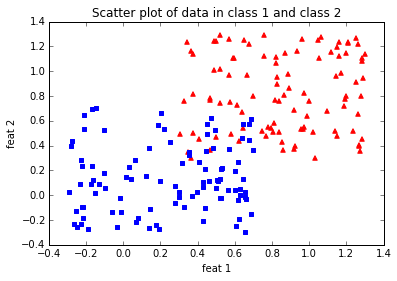

In [7]:
# define i/o
def generate_random_input (num_points_per_class):
    # randomly select class 1
    class_1_data = np.random.rand(num_points_per_class,2)
    class_1_data = class_1_data + 0.3
    class_1_label = np.tile([1, 0],(num_points_per_class,1))
    # randomly select class 2
    class_2_data = np.random.rand(num_points_per_class,2)
    class_2_data = class_2_data - 0.3
    class_2_label = np.tile([0, 1],(num_points_per_class,1))
    # concatenate data and label
    data = np.concatenate((class_1_data, class_2_data), axis=0)
    label = np.concatenate((class_1_label, class_2_label), axis=0)
    
    return data, label

def plot_data (data, label):
    for d, l in zip(data, label):
        if l[0] > 0.5:
            plt.scatter(d[0], d[1], color='r', marker='^')
        else:
            plt.scatter(d[0], d[1], color='b', marker='s')
    plt.title('Scatter plot of data in class 1 and class 2')
    plt.xlabel('feat 1')
    plt.ylabel('feat 2')
    
data, label =  generate_random_input(100)
plot_data (data, label)

In [10]:
num_iterations = 1000

nn.train(num_iterations, data, label)
nn.print_self()

Layer: layer 1
Weights
[[-1.32918953 -1.35074817 -1.04409972 -1.25170611 -0.85138336 -0.92824465
  -1.49104399 -1.37551215 -1.4857518  -1.38422479]
 [-1.34303043 -1.2020546  -0.67109525 -1.00765989 -0.96848225 -1.06287891
  -0.88988462 -0.52630509 -1.25233655 -0.61882058]]
Bias
[[-2.65377663 -2.73801229 -3.05951722 -2.83239559 -3.03163127 -2.93144263
  -2.76254179 -3.00317526 -2.64847828 -2.92035292]]
Layer: sigmoid 1
No learned parameters in this layer
Layer: layer 2
Weights
[[-0.48178787 -0.93542933 -0.02489433]
 [-0.59737504 -0.84881709 -0.16990971]
 [-0.52804819 -0.64027761 -0.7226339 ]
 [-0.06201819 -0.47931837 -0.28796621]
 [-0.7477365  -0.54171979 -0.94182331]
 [-0.86294275 -0.60074521 -0.10014021]
 [-0.56660374 -0.18611723 -0.18527255]
 [-0.08308664 -0.70785819  0.11306403]
 [-0.09615743 -0.24686963 -0.51086128]
 [-0.6167567  -0.59317896 -0.19445762]]
Bias
[[-3.25823803 -3.20700917 -3.42785438]]
Layer: sigmoid 2
No learned parameters in this layer
Layer: layer 3
Weights
[[ 0.24

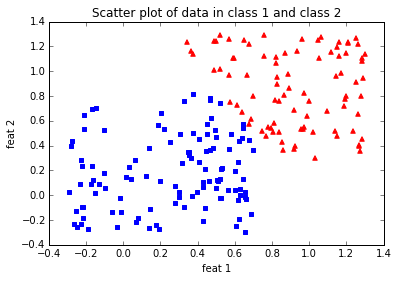

In [11]:
scores = nn.forward_pass(data)
plot_data (data, scores)